## Desafio 1 - Data Science

Para esse desafio, foi escolhido o problema de negócio verificação das classes de produtos mais propícios à insatisfação do cliente através dos dados (Product Quality).

In [1]:
# Importando as bibliotecas necessárias para o desafio 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### *Selecionando os datasets e realizando o tratamento nos dados:*

In [2]:
# Carregando "datasets" necessários
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders_ds = pd.read_csv('olist_orders_dataset.csv')
orders_itens = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')

In [3]:
# Criando 'DataFrame' para o desenvolvimento da EDA
df = orders_ds.merge(reviews, on='order_id', how='left')
df = df.merge(orders_itens, on='order_id', how='left')
df = df.merge(products, on='product_id', how='left')

# Visualizando os primeiros registros
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5.0,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5.0,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [4]:
# Visualizando as informações do novo 'DataFrame'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114092 entries, 0 to 114091
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       114092 non-null  object 
 1   customer_id                    114092 non-null  object 
 2   order_status                   114092 non-null  object 
 3   order_purchase_timestamp       114092 non-null  object 
 4   order_approved_at              113930 non-null  object 
 5   order_delivered_carrier_date   112112 non-null  object 
 6   order_delivered_customer_date  110839 non-null  object 
 7   order_estimated_delivery_date  114092 non-null  object 
 8   review_id                      113131 non-null  object 
 9   review_score                   113131 non-null  float64
 10  review_comment_title           13523 non-null   object 
 11  review_comment_message         48166 non-null   object 
 12  review_creation_date          

In [5]:
# Verificando se existem dados duplicados no 'DataFrame'
df.loc[ df.duplicated() ]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


- **OBS**: neste primeiro momento não será realizada a verificação e exclusão de dados faltantes, pois as mesmas acontecerá depois da filtragem das "features" para a exploração dos dados.

In [6]:
# Selecionando as features que serão utilizadas para a análise dos dados
df = df[['product_category_name', 'review_score', 'price', 'freight_value', 'product_name_lenght', 'product_description_lenght',
    'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']]

In [7]:
# Verificando a quantidade de dados faltantes em cada 'feature'
df.isnull().sum()

product_category_name         2390
review_score                   961
price                          778
freight_value                  778
product_name_lenght           2390
product_description_lenght    2390
product_photos_qty            2390
product_weight_g               796
product_length_cm              796
product_height_cm              796
product_width_cm               796
dtype: int64

In [8]:
# Removendo todos os registros que possuem algum dado faltante
df.dropna(inplace=True)

# Reorganizando os valores de index
df.reset_index(drop=True, inplace=True)

# Verificando novamente as informações após a filtragem das 'features' e tratamento dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110773 entries, 0 to 110772
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_category_name       110773 non-null  object 
 1   review_score                110773 non-null  float64
 2   price                       110773 non-null  float64
 3   freight_value               110773 non-null  float64
 4   product_name_lenght         110773 non-null  float64
 5   product_description_lenght  110773 non-null  float64
 6   product_photos_qty          110773 non-null  float64
 7   product_weight_g            110773 non-null  float64
 8   product_length_cm           110773 non-null  float64
 9   product_height_cm           110773 non-null  float64
 10  product_width_cm            110773 non-null  float64
dtypes: float64(10), object(1)
memory usage: 9.3+ MB


- **OBS**: a opção pela remoção dos registros com quaisquer dados faltantes ocorreu porque a quantidade dos mesmos representa um percentual baixo em relação à quantidade total de registros no 'DataFrame', apenas 3.319 em um total de 114.092 (aproximadamente 3% dos dados).

#### *EDA - Análise exploratória dos dados:*

In [9]:
# Visualizando novamente os primeiros registros do 'DataFrame' após a filtragem das "features"
df.head()

,product_category_name,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,utilidades_domesticas,4.0,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,perfumaria,4.0,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,automotivo,5.0,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,pet_shop,5.0,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,papelaria,5.0,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [10]:
# Verificando as métricas básicas dos dados
df.describe()

,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,110773.000000,110773.000000,110773.000000,110773.000000,110773.000000,110773.000000,110773.000000,110773.000000,110773.000000,110773.000000
mean,4.035225,120.482999,20.012116,48.777482,786.793226,2.207117,2096.779143,30.209166,16.609147,23.046491
std,1.385420,181.828589,15.814205,10.025168,651.612397,1.719793,3751.465382,16.174395,13.461482,11.716425
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,4.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,5.000000,74.900000,16.290000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,5.000000,134.900000,21.170000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,5.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


- É possível observar que a grande maioria das pontuações de avaliação dos clientes são iguais ou maiores que 4, pois já nota-se esse valor como resultado do primeiro quartil da 'feature' em questão. Ainda sobre as pontuações, as métricas mostram que a maioria delas é 5, pelo fato da mediana ser nesse valor e os outros 50% dos valores estarem entre 1 e 4 (essas informações ficam mais claras visualizando o gráfico abaixo). Também existem algumas outras com valores expressivos de outliers, mas eles não causarão interferência no objetivo dessa exploração de dados, pois desejamos utlizar o máximo de pontuações para verificar as classes de produtos que estão mais propícios a gerar insatisfação aos clientes.

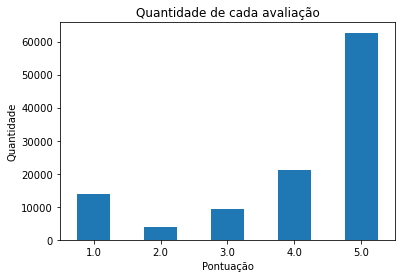

In [11]:
# Criando gráfico de barras das avaliações
df['review_score'].value_counts().sort_index().plot(kind='bar', title='Quantidade de cada avaliação', xlabel='Pontuação', ylabel='Quantidade', rot=0)
plt.show()

- O gráfico confirma as informações descritas acima sobre as notas de avaliações.

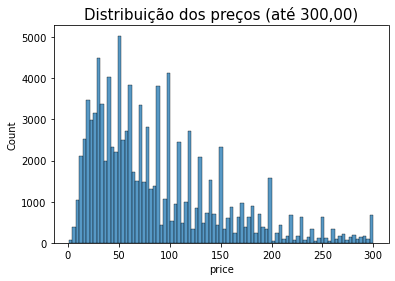

In [12]:
# Criando gráfico histograma referente aos preços dos produtos até 300,00
precos_300 = df.loc[ df['price'] <= 300 ]['price']
plt.title('Distribuição dos preços (até 300,00)', fontdict={'fontsize': 15})
sns.histplot(precos_300)
plt.show()

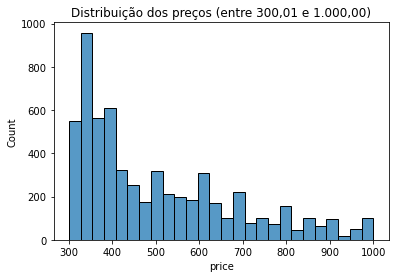

In [13]:
# Criando gráfico histograma referente aos preços dos produtos entre 300,01 e 1.000,00
precos_1000 = df.loc[ (df['price'] > 300) & (df['price'] <= 1000) ]['price']
plt.title('Distribuição dos preços (entre 300,01 e 1.000,00)')
sns.histplot(precos_1000)
plt.show()

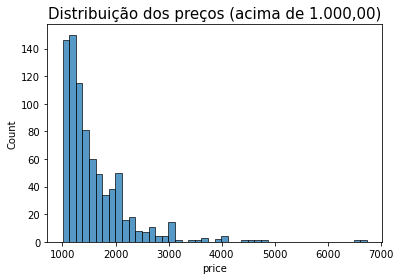

In [14]:
# Criando gráfico histograma referente aos preços dos produtos acima de 1.000,00
precos_acima_1000 = df.loc[ df['price'] > 1000 ]['price']
plt.title('Distribuição dos preços (acima de 1.000,00)', fontdict={'fontsize': 15})
sns.histplot(precos_acima_1000)
plt.show()

- Devido ao fato de optar pela utilização do máximo de pontuações referentes às avaliações possíveis, o histograma dos preços precisou ser dividido em três partes para melhor visualização, uma vez que os outliers relacionados à eles não foram removidos.

Com o objetivo de localizar as classes mais propensas à insatisfação dos clientes, serão separados em uma nova variável os registros com pontuações entre 1 e 2, possibilitando a análise com a obtenção de mais informações e retornando o resultado final dessa EDA.

In [15]:
# Criando a nova variável com os registros do 'DataFrame' de pontuação ('review_score') entre 1 e 2
df_scores_2 = df.loc[ df['review_score'] <= 2 ]
df_scores_2.reset_index(drop=True, inplace=True)
df_scores_2.head()

,product_category_name,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,moveis_decoracao,1.0,19.9,16.05,41.0,432.0,2.0,300.0,35.0,35.0,15.0
1,ferramentas_jardim,1.0,99.0,30.53,36.0,450.0,1.0,9000.0,42.0,12.0,39.0
2,ferramentas_jardim,1.0,99.0,30.53,36.0,450.0,1.0,9000.0,42.0,12.0,39.0
3,beleza_saude,2.0,109.9,8.96,46.0,2345.0,6.0,525.0,21.0,16.0,13.0
4,cool_stuff,2.0,109.9,15.53,46.0,595.0,2.0,500.0,16.0,12.0,22.0


In [16]:
# Criando variável com a contagem total dos registros de cada categoria
qtd_reg_cat = df.groupby('product_category_name')['review_score'].count().sort_values(ascending=False)

# Criando variável com a contagem dos registros com avaliações entre 1 e 2 de cada categoria
qtd_reg_cat_2 = df_scores_2.groupby('product_category_name')['review_score'].count().sort_values(ascending=False)

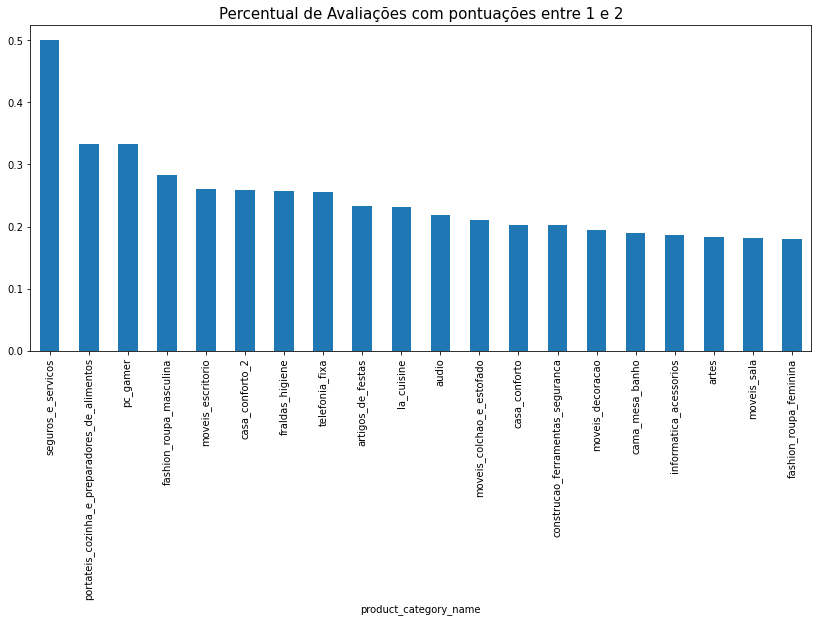

In [17]:
# Criando 'Série' com percentuais de avaliações entre 1 e 2 em relação ao total de cada categoria (apenas os 20 maiores percentuais)
perc_reg_cat = (qtd_reg_cat_2 / qtd_reg_cat).sort_values(ascending=False).head(20)
plt.figure(figsize=(14, 6))
plt.title('Percentual de Avaliações com pontuações entre 1 e 2', fontdict={'fontsize': 15})
perc_reg_cat.plot(kind='bar')
plt.show()

- **OBS**: os percentuais listados não levam em consideração a quantidade de registros (avaliações) da categoria, dessa forma não é uma boa conclusão afirmar que, por exemplo, a categoria 'seguros_e_servicos' é a mais propensa a insatisfação dos clientes, pois só existem 2 registros referentes aos produtos da mesma. Para fazer uma análise mais coerente, serão consideradas apenas as categoria que possuirem ao menos 1.000 registros, cerca de 1% do total do 'DataFrame' (110.773).

In [18]:
# 'Looping' para verificar a quantidade de registros (avaliações) das 20 categorias com maiores percentuais de pontuações entre 1 e 2
for cat in perc_reg_cat.index:
    # Teste lógico para destacar as categorias que possuem 1.000 registros ou mais
    if qtd_reg_cat[cat] >= 1000:
        print(f'\033[1mCategoria: {cat} | Total de avaliações: {qtd_reg_cat[cat]}')
    else:
        print(f'\033[0mCategoria: {cat} | Total de avaliações: {qtd_reg_cat[cat]}')

Categoria: seguros_e_servicos | Total de avaliações: 2
Categoria: portateis_cozinha_e_preparadores_de_alimentos | Total de avaliações: 15
Categoria: pc_gamer | Total de avaliações: 9
Categoria: fashion_roupa_masculina | Total de avaliações: 131
Categoria: moveis_escritorio | Total de avaliações: 1687
Categoria: casa_conforto_2 | Total de avaliações: 27
Categoria: fraldas_higiene | Total de avaliações: 39
Categoria: telefonia_fixa | Total de avaliações: 262
Categoria: artigos_de_festas | Total de avaliações: 43
Categoria: la_cuisine | Total de avaliações: 13
Categoria: audio | Total de avaliações: 361
Categoria: moveis_colchao_e_estofado | Total de avaliações: 38
Categoria: casa_conforto | Total de avaliações: 435
Categoria: construcao_ferramentas_seguranca | Total de avaliações: 193
Categoria: moveis_decoracao | Total de avaliações: 8331
Categoria: cama_mesa_banho | Total de avaliações: 11137
Categoria: informatica_acessorios | Total de avaliações: 7849
Categoria: artes | Total de aval

In [19]:
# 'Looping' listando as categorias identificadas na análise
categorias = ['moveis_escritorio', 'moveis_decoracao', 'cama_mesa_banho', 'informatica_acessorios']
for cat in categorias:
    print(f'Categoria: {cat} | Percentual: {round(perc_reg_cat[cat], 4) * 100}%')

Categoria: moveis_escritorio | Percentual: 26.08%
Categoria: moveis_decoracao | Percentual: 19.46%
Categoria: cama_mesa_banho | Percentual: 18.96%
Categoria: informatica_acessorios | Percentual: 18.61%


#### *Conclusão*

Após toda a análise e exploração dos dados (EDA), com os "insights" e informações obtidas mediante a mesma, podemos concluir que as categorias mais propícias à insatisfação dos clientes, com base no conjunto de dados disponibilizado pela Olist, são as seguintes:
- Móveis de Escritório
- Móveis de Decoração
- Cama, Mesa e Banho
- Informática - Acessórios